## Final Project 
“Visualization dan Clustering di Python : World Happiness Report”


__Kelompok 6__
1. Aam Shodiqul M
2. Daniel Yanuarius W
3. Della Aswintha A
4. Desain Unggul P

### Daftar Isi
1. Latar Belakang, Tujuan & Manfaat
2. Sumber data
3. Metode Pengumpulan & Analisa data
4. Output
5. Kesimpulan dan saran

### Latar Belakang

World Happiness report diukur berdasarkan banyak faktor- faktor seperti tingkat harapan hidup, pendapatan per kapita, kebebasan hidup dan sebagainya
Kondisi eksternal juga diukur seperti tingkat pendapatan, kesehatan, kesempatan kerja, perhatian sosial seperti menyumbang (generosity) dan tatakelola negara.

## Tujuan & Manfaat
Tujuan
- Project ini bertujuan untuk visualiasi dan clustering data "*World Happiness Report*" menggunakan beberapa metode yaitu, K-Means, *Agglomerative*, *Affinity* dan *Guassian Mixture Model* (GMM) berdasarkan dengan beberapa faktor seperti GDP per kapita, *life expectancy*, *corruption* serta faktor lainnya sehingga mengetahui hasil analisa visualisasi dari masing-masing metode

Manfaat
- Mengetahui dan memetakan negara-negara bahagia dan kurang bahagia menggunakan score-score yang ada pada data berdasarkan algoritma clustering K-Means, *Agglomerative*, *Affinity* dan *Guassian Mixture Model* (GMM)

## Sumber Data 
Datasources : "*World Happiness Report.csv*" yang diperoleh dari worldhappiness.report/ed/

## Metode Pengumpulan Data

Data sekunder adalah data yang mengacu pada informasi yang dikumpulkan dari sumber yang telah ada. Sumber data sekunder adalah catatan atau dokumentasi perusahaan, publikasi pemerintah, analisis industri oleh media, situs Web, internet dan seterusnya (Uma Sekaran, 2011).

## Analisa Data

Data akan diolah menggunakan 4 metode clustering yaitu K-Means, Agglomerative, Guassian Mixture Model dan Affinity Propagation. Metode K-means yaitu salah satu metode clustering non hirarki yang berusaha mempartisi data yang ada ke dalam bentuk satu atau lebih cluster. Selain itu, metode Agglomerative yaitu suatu metode *hierarchical clustering* yang bersifat *bottom-up*, yang menggabungkan n buah klaster menjadi satu klaster tunggal. Metode GMM dapat digunakan untuk cluster data tanpa label dalam banyak cara yang sama seperti K-means. Terakhir, metode *Affinity Propagation* mengansumsikan semua titik data sebagai pusat cluster dan tidak tergantung pada kualitas set awal pusat cluster.

## Visualisasi dan Clustering Data
Metode K-Means, *Agglomerative*, *Affinity* dan *Guassian Mixture Model* (GMM)

In [1]:
import time                   
import warnings               

import numpy as np            # manipulasi angka data
import pandas as pd           # Dataframe ngulik 
import matplotlib.pyplot as plt # Buat ngeplot
import seaborn as sns
import plotly.plotly as py  # World Map
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  #  skala dataset & normalisasi
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #buat import algo clustering
from sklearn.mixture import GaussianMixture #buat import algo GMM clustering

import os                     
import sys                    


## Read Data

In [2]:
wh = pd.read_csv("D://DTS/2017.csv") #buat make dataset (ubah ke windows)
wh.head() #buat ngeliat dataset cuilan

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
print("Dimension of dataset: wh.shape")
wh.dtypes #ngeliatkan tipe2 datanya

Dimension of dataset: wh.shape


Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

#### Korelasi antara variables
Pada bagian ini untuk mengetahui hubungan atau korelasi antara variabel menggunakan *correlation matrix* yang divisualisasi dengan heatmap

In [4]:
#wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
#          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #buat make kolom-kolom yang penting
#cor = wh1.corr() #itung korelasinya atau hubungan antar data pake correlation matrix
#sns.heatmap(cor, square = True, linewidth = .5, annot=True, vmin=0, vmax=1) 

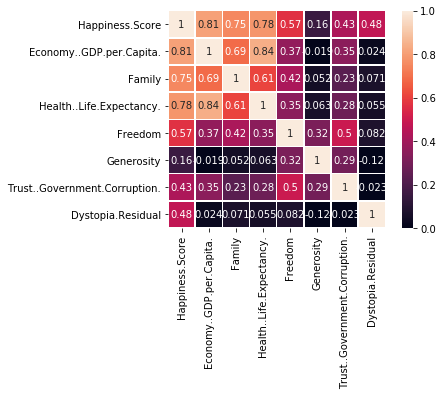

In [5]:
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #buat make kolom-kolom yang penting
cor = wh1.corr() #itung korelasinya atau hubungan antar data pake correlation matrix
sns.heatmap(cor, square = True, linewidth = .5, annot=True, vmin=0, vmax=1) 

Makin tinggi hubungannya makin besar score nya begitupula semakin warnanya muda semakin tinggi korelasinya. Contohnya: *Economy* sama *Health life* skornya 0,84 berarti korelasinya tinggi

## Visualisasi dengan Choropleth
Pada bagian ini untuk mengetahui *plotting world map* berdasarkan *Happiness Score* nya 

In [6]:
#Ref: https://plot.ly/python/choropleth-maps/
data = dict(type = 'choropleth', 
           locations = wh['Country'],
           locationmode = 'country names',
           z = wh['Happiness.Score'], 
           text = wh['Country'],
           colorbar = {'title':'Happiness'}
           ,colorscale = 'Rainbow')
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## Skala Data

Terlebih dahulu akan di skalain datanya sebelum ke tahap selanjutnya (tahap clustering), karena clustering sangat sensitif sama yang namanya *range data*

In [7]:
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.17193469, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.35994869, -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

## K-Means Clustering


In [8]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

#bikin cluster 2

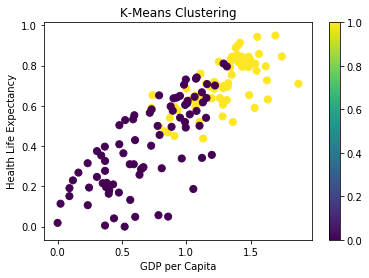

In [9]:
#Plot cluster Kmeans nya berdasarkan GDP dan Health
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health Life Expectancy')
plt.colorbar(scatter)

## Agglomerative

In [10]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

#ini methode agglomeartive / hierarchial cluster pake 2 cluster

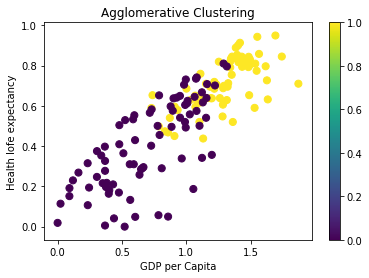

In [11]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health lofe expectancy')
plt.colorbar(scatter)

#ini scatter plot hierarchial clustering

## Affinity

In [12]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)
#ini Affinity cluster

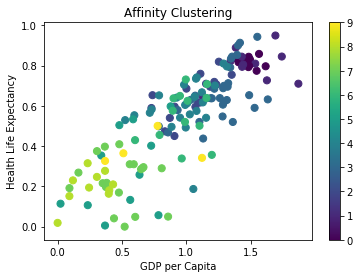

In [13]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health Life Expectancy')
plt.colorbar(scatter)

#ini plot affinity 

## Gaussian Mixture Model


In [14]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)
 #ini plotting gaussian mixture model

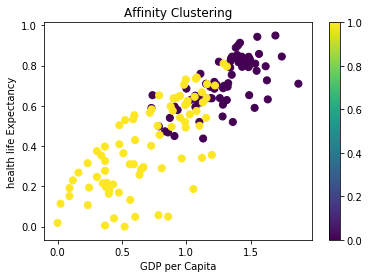

In [15]:
#Plotting cluster 
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=gmm[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('health life Expectancy')
plt.colorbar(scatter)

In [16]:
#wh1.head()

### Visualisasi negera berdasarkan hasil clustering 

In [17]:
data = [dict(type='choropleth',
             locations = wh['Country'],
             locationmode = 'country names',
             z = wh1['kmeans'],
             text = wh['Country'],
             colorbar = {'title':'Cluster Group'},
             colorscale = 'Viridis')]
layout = dict(title='Pengkelompokkan negara berdasarkan K-Means Clustering',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

In [18]:
data = [dict(type='choropleth',
             locations = wh['Country'],
             locationmode = 'country names',
             z = wh1['agglomerative'],
             text = wh['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscale = 'Viridis')]
layout = dict(title='Pengkelompokkan negara berdasarkan Agglomerative Clustering',
              geo=dict(showframe = False, 
                       projection = {'type':'mercator'}))
map2 = dict(data=data, layout=layout)
iplot(map2)

In [19]:
data = [dict(type='choropleth',
             locations = wh['Country'],
             locationmode = 'country names',
             z = wh1['affinity'],
             text = wh['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscale = 'Viridis')]
layout = dict(title='Pengkelompokkan negara Affinity Clustering',
              geo=dict(showframe = False, projection = {'type':'mercator'}))
map3 = dict(data=data, layout=layout)
iplot(map3)

In [20]:
data = [dict(type='choropleth',
             locations = wh['Country'],
             locationmode = 'country names',
             z = wh1['gmm'],
             text = wh['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscale = 'Viridis')]
layout = dict(title='Pengkelompokkan negara berdasarkan GMM clustering',
              geo=dict(showframe = False, projection = {'type':'mercator'}))
map4 = dict(data=data, layout=layout)
iplot(map4)

## Kesimpulan & Saran

<div class="alert alert-info" role="alert" style="margin-top: 10px">
<p><strong>Kesimpulan</strong><p>

<p>1. Menghasilkan analisis data <i>World Happiness Report</i> menggunakan metode K-means, Affinity, Guassian Mixture Model (GMM)
 dan Agglomerative <br> 2. Berdasarkan hasil visual analisis heat map dari clustering negara menunjukkan bahwa metode k-means, Agglomerative dan GMM memberikan hasil yang sama terhadap kasus <i>World Happiness Report </i> <br> 3. GDP per capita berkorelasi dengan Tingkat Usia Harapan Hidup, Jika GDP per Kapita tinggi maka kemungkinan besar Harapan hidupnya juga tinggi <br> 4. Kebanyakan negara yang memiliki tingkat kebahagiaan yang tinggi berada di benua Amerika, Eropa, dan Australia dan kebanyakan negara yang memiliki tingkat kebahagiaan yang rendah berada di benua Asia dan Afrika</i> </p>
</div>


<div class="alert alert-danger" role="alert" style="margin-top: 10px">
<p><strong>Saran</strong><p>

<p>1. Analisa dan visualisasi data bisa dikembangkan dengan menerapkan metrik seperti <i>Normalized Mutual Information</i> dan <i>Adjusted Rand Score</i></p>
</div>